## Images

**Вопрос**: Что хранится в значении пикселя? (число от 0 до 255)

<!--
В значении пикселя хранится информация о цвете этого пикселя в формате RGB. Каждый пиксель представлен тремя значениями:

    Red (R): значение для красного канала (0-255)
    Green (G): значение для зеленого канала (0-255)
    Blue (B): значение для синего канала (0-255)

Таким образом, каждое значение от 0 до 255 указывает на интенсивность соответствующего цвета, где 0 — это отсутствие цвета, а 255 — максимальная интенсивность.
-->

**Вопрос**: Что если все цвета 255?

<!--
Если все три канала (R, G, B) равны 255, это означает, что пиксель будет чисто белым. Белый цвет создаётся при максимальной интенсивности всех трех цветовых каналов.
-->

**Вопрос**: Что если все цвета 0?

<!--
Если все три канала равны 0 (R = 0, G = 0, B = 0), это означает, что пиксель будет черным. Черный цвет создаётся при отсутствии всех цветовых каналов.
-->

**Вопрос**: Что если `red = 255`, а `green = blue = 0`?

<!--
Если красный канал равен 255, а зеленый и синий каналы равны 0 (R = 255, G = 0, B = 0), пиксель будет отображаться как чисто красный. Этот цвет получается, когда присутствует только максимальная интенсивность красного цвета.
-->

**Вопрос**: Что если все каналы равны друг другу?

<!--
Если все три канала равны друг другу (например, R = G = B = X), то цвет пикселя будет оттенком серого. Интенсивность этого оттенка будет зависеть от значения X:

    Если X = 0, то это черный цвет.
    Если X = 255, то это белый цвет.
    Если 0 < X < 255, то это будет оттенок серого (светло-серый, средне-серый или темно-серый в зависимости от значения X).
-->

In [1]:
[ 1, 64, 64 ] # черно-белая

[1, 64, 64]

In [2]:
[ 3, 64, 64 ] # цветная картинка

[3, 64, 64]

In [3]:
!ls

4_cnn.pdf           62ixgw.jpg.2        best_checkpoint.pth tmp
4_code.ipynb        62ixgw.jpg.3        hse.jpeg
62ixgw.jpg          658r4d.jpg          orig
62ixgw.jpg.1        658r4d.jpg.1        tboard_logs


In [4]:
!wget https://i.imgflip.com/62ixgw.jpg #В Jupyter Notebook и IPython символ ! используется для выполнения команд оболочки (например, Unix/Linux команд) прямо из ячейки

--2024-10-05 15:49:21--  https://i.imgflip.com/62ixgw.jpg
Resolving i.imgflip.com (i.imgflip.com)... 104.16.71.101, 104.16.40.101
Connecting to i.imgflip.com (i.imgflip.com)|104.16.71.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69445 (68K) [image/jpeg]
Saving to: ‘62ixgw.jpg.4’

62ixgw.jpg.4        100%[===================>]  67.82K  --.-KB/s    in 0.006s  

2024-10-05 15:49:21 (11.3 MB/s) - ‘62ixgw.jpg.4’ saved [69445/69445]



У изображений обычно 3 канала. Мы будем работать с RGB-каналами. 

---

Значение каждого пикселя [0..255] -- это его яркость

In [5]:
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread("./62ixgw.jpg") #Функция cv2.imread из библиотеки OpenCV используется для загрузки изображений из файла в виде NumPy массива
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
'''
- cv2.COLOR_BGR2RGB — это константа в библиотеке OpenCV, 
используемая для указания преобразования цветового пространства из 
формата BGR (синий, зеленый, красный) в RGB (красный, зеленый, синий). 
Это важно, потому что OpenCV по умолчанию загружает изображения в формате BGR, 
в то время как многие другие библиотеки, такие как Matplotlib и PIL, работают с форматом RGB.

- cv2.cvtColor из библиотеки OpenCV используется для 
преобразования цветового пространства изображений. Она позволяет 
изменять представление цвета изображения, например, преобразовывать из 
формата BGR (который используется в OpenCV) в RGB, Grayscale и другие цветовые пространства.

'''
img_rgb.shape

(433, 577, 3)

In [6]:
img_bgr

array([[[204, 181, 155],
        [206, 183, 157],
        [209, 186, 160],
        ...,
        [230, 199, 174],
        [227, 196, 171],
        [225, 194, 169]],

       [[194, 171, 145],
        [200, 177, 151],
        [207, 184, 158],
        ...,
        [232, 201, 176],
        [229, 198, 173],
        [227, 196, 171]],

       [[185, 162, 136],
        [189, 166, 140],
        [194, 171, 145],
        ...,
        [235, 204, 179],
        [232, 201, 176],
        [230, 199, 174]],

       ...,

       [[ 56,  44,  32],
        [ 58,  46,  34],
        [ 60,  48,  36],
        ...,
        [ 58,  44,  55],
        [ 58,  45,  53],
        [ 61,  50,  58]],

       [[ 58,  46,  34],
        [ 55,  43,  31],
        [ 57,  45,  33],
        ...,
        [103,  88,  96],
        [100,  83,  92],
        [ 97,  84,  92]],

       [[ 57,  45,  33],
        [ 57,  45,  33],
        [ 58,  46,  34],
        ...,
        [123, 108, 116],
        [108,  93, 101],
        [100,  85,  93]]

In [7]:
img_rgb

array([[[155, 181, 204],
        [157, 183, 206],
        [160, 186, 209],
        ...,
        [174, 199, 230],
        [171, 196, 227],
        [169, 194, 225]],

       [[145, 171, 194],
        [151, 177, 200],
        [158, 184, 207],
        ...,
        [176, 201, 232],
        [173, 198, 229],
        [171, 196, 227]],

       [[136, 162, 185],
        [140, 166, 189],
        [145, 171, 194],
        ...,
        [179, 204, 235],
        [176, 201, 232],
        [174, 199, 230]],

       ...,

       [[ 32,  44,  56],
        [ 34,  46,  58],
        [ 36,  48,  60],
        ...,
        [ 55,  44,  58],
        [ 53,  45,  58],
        [ 58,  50,  61]],

       [[ 34,  46,  58],
        [ 31,  43,  55],
        [ 33,  45,  57],
        ...,
        [ 96,  88, 103],
        [ 92,  83, 100],
        [ 92,  84,  97]],

       [[ 33,  45,  57],
        [ 33,  45,  57],
        [ 34,  46,  58],
        ...,
        [116, 108, 123],
        [101,  93, 108],
        [ 93,  85, 100]]

##### POV: Когда знаете, что студент делает домашку за день до дедлайна

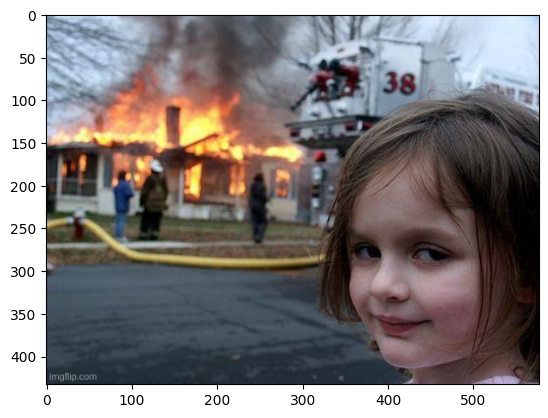

In [8]:
plt.imshow(img_rgb)

In [9]:
img_rgb

array([[[155, 181, 204],
        [157, 183, 206],
        [160, 186, 209],
        ...,
        [174, 199, 230],
        [171, 196, 227],
        [169, 194, 225]],

       [[145, 171, 194],
        [151, 177, 200],
        [158, 184, 207],
        ...,
        [176, 201, 232],
        [173, 198, 229],
        [171, 196, 227]],

       [[136, 162, 185],
        [140, 166, 189],
        [145, 171, 194],
        ...,
        [179, 204, 235],
        [176, 201, 232],
        [174, 199, 230]],

       ...,

       [[ 32,  44,  56],
        [ 34,  46,  58],
        [ 36,  48,  60],
        ...,
        [ 55,  44,  58],
        [ 53,  45,  58],
        [ 58,  50,  61]],

       [[ 34,  46,  58],
        [ 31,  43,  55],
        [ 33,  45,  57],
        ...,
        [ 96,  88, 103],
        [ 92,  83, 100],
        [ 92,  84,  97]],

       [[ 33,  45,  57],
        [ 33,  45,  57],
        [ 34,  46,  58],
        ...,
        [116, 108, 123],
        [101,  93, 108],
        [ 93,  85, 100]]

In [10]:
img_rgb[:3, :3, :]

array([[[155, 181, 204],
        [157, 183, 206],
        [160, 186, 209]],

       [[145, 171, 194],
        [151, 177, 200],
        [158, 184, 207]],

       [[136, 162, 185],
        [140, 166, 189],
        [145, 171, 194]]], dtype=uint8)

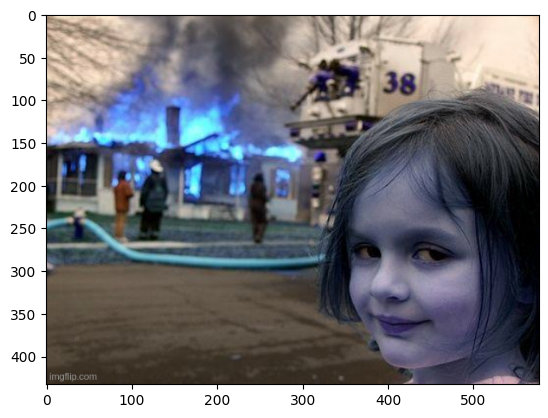

In [11]:
plt.imshow(img_bgr)

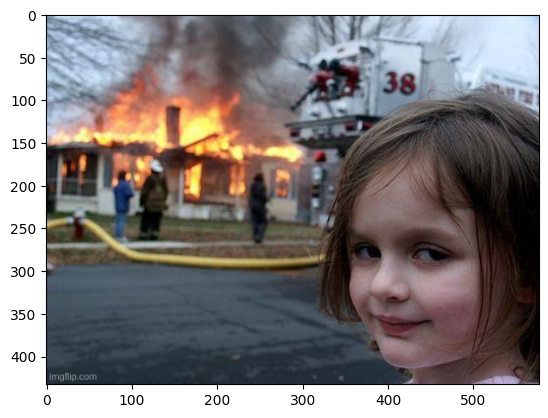

In [12]:
plt.imshow(img_rgb)

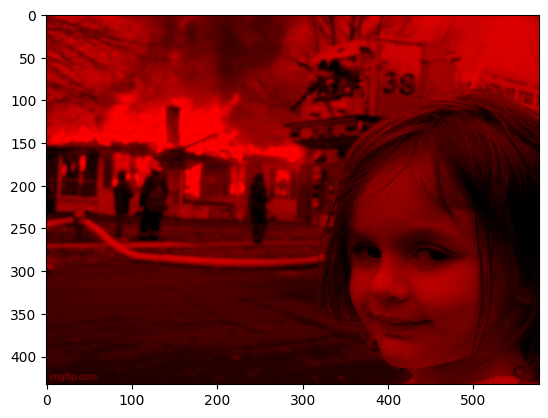

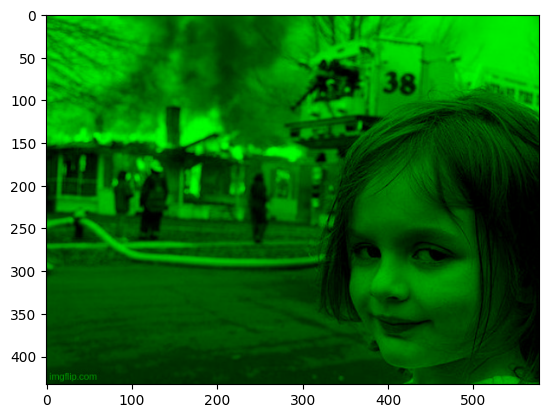

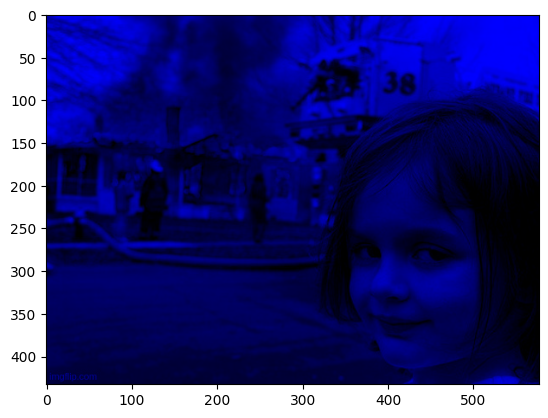

In [13]:
for i in range(3):
    plt.figure(i)
    img_copy = img_rgb.copy()
    img_copy[:, :, (i + 1) % 3] = 0 # Убираем один канал
    img_copy[:, :, (i + 2) % 3] = 0 # Убираем другой канал
    '''
    Например, если i = 0, то обнуляются зеленый и синий каналы, 
    и остаётся только красный. Если i = 1, остаётся только зеленый, и так далее.
    '''
    plt.imshow(img_copy)

# Свертки

Док. [pytorch Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

* **kernel_size** --- размер ядра свертки (так ядро иногда называют фильтром). На гифке размер ядра 3 на 3. Можно сделать несимметричную свертку (например, 1 на 10), но на практике используют симметричные
* **padding** --- отступ, ширина "рамочки", котрая будет дорисовываться вокруг нашего изображения
* **stride** --- размер шага ядра


**Важно**: ядро -- это серый квадратик (3x3), который бегает по синему  квадратику. Зеленый квадратик -- это результат работы свертки.




<img src="https://cdn-images-1.medium.com/max/1600/0*1PSMTM8Brk0hsJuF." width=450 height=400>

Забегая вперед, это визуализация тут `nn.Conv2d(1, 1, kernel_size=3, stride=2, padding=1)`

Результаты свертки каждого скользящего окна складываются


# Как свертки работают для цветного изображения?

https://cs231n.github.io/convolutional-networks/

> The visualization below iterates over the output activations (green), and shows that each element is computed by elementwise multiplying the highlighted input (blue) with the filter (red), summing it up, and then offsetting the result by the bias

## Попробуем применить свертку к изображению

In [14]:
!wget https://www.hse.ru/data/2021/08/25/1414838109/3HSE-8086_Preview.jpeg -O hse.jpeg

--2024-10-05 15:50:05--  https://www.hse.ru/data/2021/08/25/1414838109/3HSE-8086_Preview.jpeg
Resolving www.hse.ru (www.hse.ru)... 178.248.234.104
Connecting to www.hse.ru (www.hse.ru)|178.248.234.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59741 (58K) [image/jpeg]
Saving to: ‘hse.jpeg’

hse.jpeg            100%[===================>]  58.34K  --.-KB/s    in 0.009s  

2024-10-05 15:50:05 (6.69 MB/s) - ‘hse.jpeg’ saved [59741/59741]



##### Храм науки

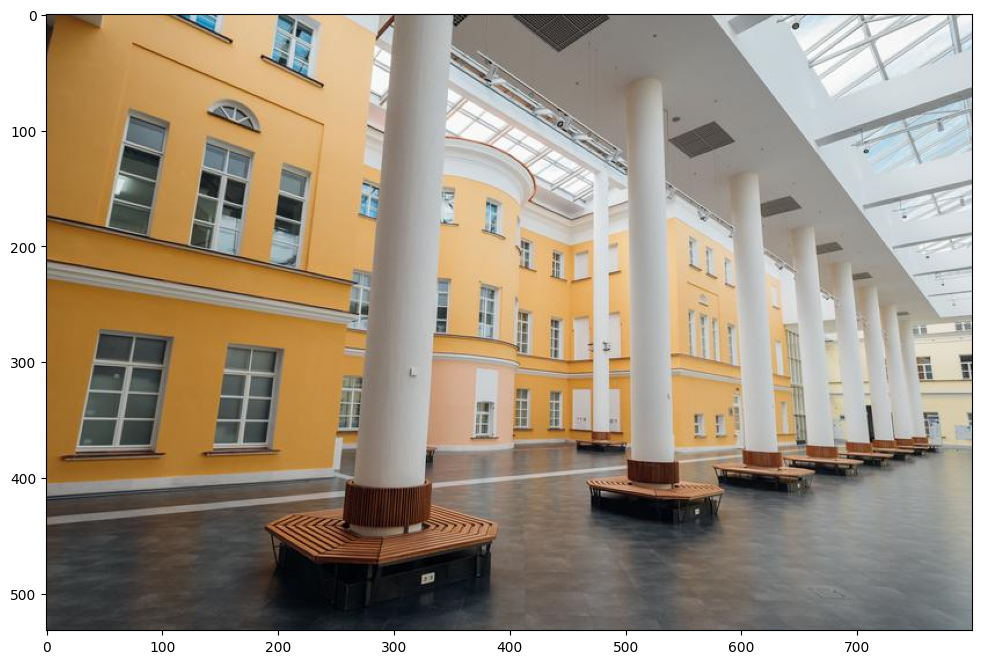

In [15]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./hse.jpeg")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (12, 8))
plt.imshow(RGB_img)
plt.show()

In [16]:
RGB_img

array([[[ 95,  77,  67],
        [ 93,  76,  68],
        [ 90,  75,  68],
        ...,
        [246, 244, 247],
        [245, 245, 247],
        [245, 245, 247]],

       [[ 92,  74,  64],
        [ 90,  73,  65],
        [ 88,  73,  66],
        ...,
        [245, 245, 247],
        [245, 245, 247],
        [245, 245, 247]],

       [[ 87,  70,  62],
        [ 85,  71,  62],
        [ 83,  70,  62],
        ...,
        [246, 246, 248],
        [245, 245, 247],
        [244, 245, 247]],

       ...,

       [[ 58,  59,  61],
        [ 58,  59,  61],
        [ 57,  58,  60],
        ...,
        [126, 137, 139],
        [127, 138, 140],
        [128, 139, 141]],

       [[ 54,  55,  57],
        [ 54,  55,  57],
        [ 54,  55,  57],
        ...,
        [126, 137, 139],
        [127, 138, 140],
        [128, 139, 141]],

       [[ 52,  53,  55],
        [ 52,  53,  55],
        [ 52,  53,  55],
        ...,
        [126, 137, 139],
        [127, 138, 140],
        [128, 139, 141]]

In [17]:
import torch
import torch.nn as nn
from torch.nn import functional as F

In [18]:
torch.from_numpy(RGB_img).type(torch.float32)

tensor([[[ 95.,  77.,  67.],
         [ 93.,  76.,  68.],
         [ 90.,  75.,  68.],
         ...,
         [246., 244., 247.],
         [245., 245., 247.],
         [245., 245., 247.]],

        [[ 92.,  74.,  64.],
         [ 90.,  73.,  65.],
         [ 88.,  73.,  66.],
         ...,
         [245., 245., 247.],
         [245., 245., 247.],
         [245., 245., 247.]],

        [[ 87.,  70.,  62.],
         [ 85.,  71.,  62.],
         [ 83.,  70.,  62.],
         ...,
         [246., 246., 248.],
         [245., 245., 247.],
         [244., 245., 247.]],

        ...,

        [[ 58.,  59.,  61.],
         [ 58.,  59.,  61.],
         [ 57.,  58.,  60.],
         ...,
         [126., 137., 139.],
         [127., 138., 140.],
         [128., 139., 141.]],

        [[ 54.,  55.,  57.],
         [ 54.,  55.,  57.],
         [ 54.,  55.,  57.],
         ...,
         [126., 137., 139.],
         [127., 138., 140.],
         [128., 139., 141.]],

        [[ 52.,  53.,  55.],
       

In [19]:
torch.from_numpy(RGB_img).type(torch.float32).shape

torch.Size([532, 800, 3])

In [20]:
torch.from_numpy(RGB_img).type(torch.float32).unsqueeze(0)

tensor([[[[ 95.,  77.,  67.],
          [ 93.,  76.,  68.],
          [ 90.,  75.,  68.],
          ...,
          [246., 244., 247.],
          [245., 245., 247.],
          [245., 245., 247.]],

         [[ 92.,  74.,  64.],
          [ 90.,  73.,  65.],
          [ 88.,  73.,  66.],
          ...,
          [245., 245., 247.],
          [245., 245., 247.],
          [245., 245., 247.]],

         [[ 87.,  70.,  62.],
          [ 85.,  71.,  62.],
          [ 83.,  70.,  62.],
          ...,
          [246., 246., 248.],
          [245., 245., 247.],
          [244., 245., 247.]],

         ...,

         [[ 58.,  59.,  61.],
          [ 58.,  59.,  61.],
          [ 57.,  58.,  60.],
          ...,
          [126., 137., 139.],
          [127., 138., 140.],
          [128., 139., 141.]],

         [[ 54.,  55.,  57.],
          [ 54.,  55.,  57.],
          [ 54.,  55.,  57.],
          ...,
          [126., 137., 139.],
          [127., 138., 140.],
          [128., 139., 141.]],



In [21]:
torch.from_numpy(RGB_img).type(torch.float32).unsqueeze(0).shape

torch.Size([1, 532, 800, 3])

In [22]:
img_t = torch.from_numpy(RGB_img).type(torch.float32).unsqueeze(0) # Преобразуем NumPy массив в тензор, .unsqueeze(0) добавляет размерность батча, чтобы тензор стал размером [1, H, W, C].
kernel = torch.tensor([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]).reshape(1, 1, 3, 3).type(torch.float32) 

- Здесь создается ядро свертки, которое представляет собой единичный фильтр, 
сосредоточенный в центре (по сути, он оставляет значение пикселя нетронутым), 
- .reshape(1, 1, 3, 3) задает размерность ядра как [out_channels, in_channels, kernel_height, kernel_width].

In [23]:
kernel

tensor([[[[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]]]])

In [24]:
help(torch.Tensor.repeat)

Help on method_descriptor:

repeat(...)
    repeat(*sizes) -> Tensor
    
    Repeats this tensor along the specified dimensions.
    
    Unlike :meth:`~Tensor.expand`, this function copies the tensor's data.
    
    .. warning::
    
        :meth:`~Tensor.repeat` behaves differently from
        `numpy.repeat <https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html>`_,
        but is more similar to
        `numpy.tile <https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html>`_.
        For the operator similar to `numpy.repeat`, see :func:`torch.repeat_interleave`.
    
    Args:
        sizes (torch.Size or int...): The number of times to repeat this tensor along each
            dimension
    
    Example::
    
        >>> x = torch.tensor([1, 2, 3])
        >>> x.repeat(4, 2)
        tensor([[ 1,  2,  3,  1,  2,  3],
                [ 1,  2,  3,  1,  2,  3],
                [ 1,  2,  3,  1,  2,  3],
                [ 1,  2,  3,  1,  2,  3]])
       

In [25]:
kernel = kernel.repeat(3, 3, 1, 1) # repeat(3, 3, 1, 1) дублирует ядро для каждого канала (R, G, B), чтобы оно могло применяться ко всем трем цветовым каналам изображения.

In [26]:
kernel

tensor([[[[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]]]])

In [27]:
kernel.shape

torch.Size([3, 3, 3, 3])

In [28]:
img_t = img_t.permute(0, 3, 1, 2)  # С помощью permute изменяем порядок осей тензора изображения, чтобы он соответствовал ожидаемому формату для conv2d — [batch_size, channels, height, width].
img_t = nn.ReflectionPad2d(1)(img_t)  # Используется ReflectionPad2d(1) для добавления паддинга по одному пикселю с каждой стороны изображения, что позволяет сохранить размер выходного изображения после свертки.

result = F.conv2d(img_t, kernel)[0]  # F.conv2d применяет свертку к изображению с использованием заданного ядра. В результате получается тензор, и мы берем первый элемент (который соответствует размеру батча).

In [29]:
RGB_img.shape

(532, 800, 3)

In [30]:
result.shape

torch.Size([3, 532, 800])

In [31]:
result

tensor([[[239., 237., 233.,  ..., 737., 737., 737.],
         [230., 228., 227.,  ..., 737., 737., 737.],
         [219., 218., 215.,  ..., 740., 737., 736.],
         ...,
         [178., 178., 175.,  ..., 402., 405., 408.],
         [166., 166., 166.,  ..., 402., 405., 408.],
         [160., 160., 160.,  ..., 402., 405., 408.]],

        [[239., 237., 233.,  ..., 737., 737., 737.],
         [230., 228., 227.,  ..., 737., 737., 737.],
         [219., 218., 215.,  ..., 740., 737., 736.],
         ...,
         [178., 178., 175.,  ..., 402., 405., 408.],
         [166., 166., 166.,  ..., 402., 405., 408.],
         [160., 160., 160.,  ..., 402., 405., 408.]],

        [[239., 237., 233.,  ..., 737., 737., 737.],
         [230., 228., 227.,  ..., 737., 737., 737.],
         [219., 218., 215.,  ..., 740., 737., 736.],
         ...,
         [178., 178., 175.,  ..., 402., 405., 408.],
         [166., 166., 166.,  ..., 402., 405., 408.],
         [160., 160., 160.,  ..., 402., 405., 408.]]]

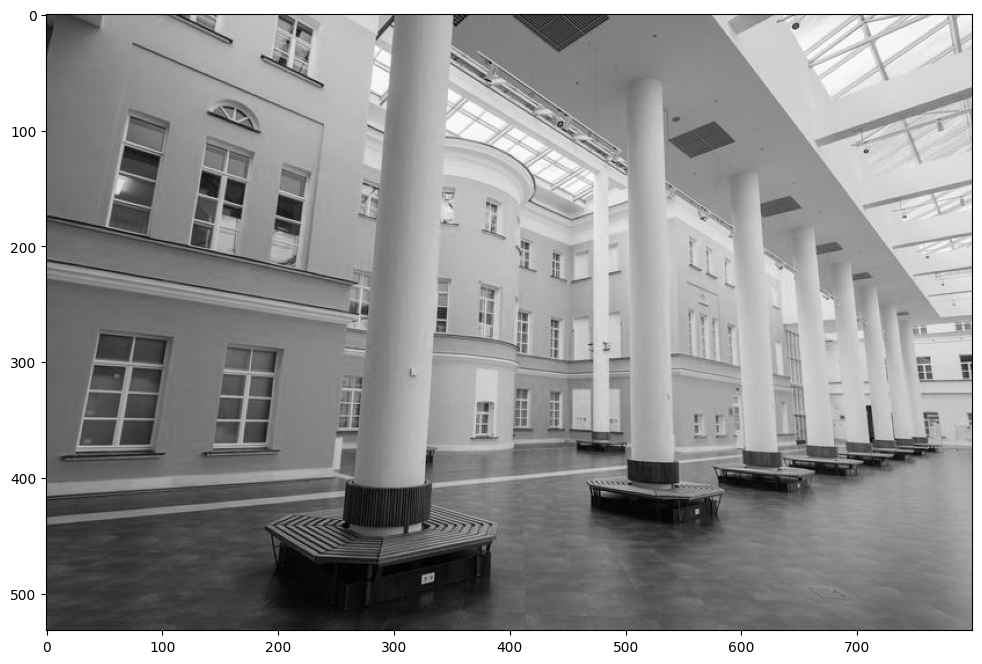

In [32]:
plt.figure(figsize = (12, 8))
result_np = result.permute(1, 2, 0).numpy() / 256 / 3 #- Метод permute в PyTorch изменяет порядок осей (или измерений) тензора
plt.imshow(result_np[:, :, :])
plt.show()

**Зачем делим на 256? А на 3?**

<!--

- / 256:
    Это деление нормализует значения пикселей. Предполагается, что исходные значения пикселей 
    находятся в диапазоне от 0 до 255 (например, при использовании uint8).
    Деление на 256 (не на 255) приводит значения в диапазон от 0 до 1, что часто необходимо 
    при обработке изображений, чтобы использовать их в нейросетях или для визуализации.
    
- / 3:
    Деление на 3 выполняется для усреднения цветовых каналов. 
    Если result — это результат свертки с тремя цветами (R, G, B), это может быть сделано для получения 
    "серой" версии изображения.
    Однако деление на 3 уменьшает значения всех каналов, и, если изображение было RGB, 
    то оно может потерять цвет. Например, если 
    у вас есть максимальное значение 1 для 
    каждого канала после предыдущего деления, то после деления на 3 
    значение каждого канала станет 1/3, что приведет к затемнению изображения.
-->

In [33]:
result_np

array([[[0.3111979 , 0.3111979 , 0.3111979 ],
        [0.30859375, 0.30859375, 0.30859375],
        [0.3033854 , 0.3033854 , 0.3033854 ],
        ...,
        [0.95963544, 0.95963544, 0.95963544],
        [0.95963544, 0.95963544, 0.95963544],
        [0.95963544, 0.95963544, 0.95963544]],

       [[0.29947916, 0.29947916, 0.29947916],
        [0.296875  , 0.296875  , 0.296875  ],
        [0.2955729 , 0.2955729 , 0.2955729 ],
        ...,
        [0.95963544, 0.95963544, 0.95963544],
        [0.95963544, 0.95963544, 0.95963544],
        [0.95963544, 0.95963544, 0.95963544]],

       [[0.28515625, 0.28515625, 0.28515625],
        [0.28385416, 0.28385416, 0.28385416],
        [0.2799479 , 0.2799479 , 0.2799479 ],
        ...,
        [0.9635417 , 0.9635417 , 0.9635417 ],
        [0.95963544, 0.95963544, 0.95963544],
        [0.9583333 , 0.9583333 , 0.9583333 ]],

       ...,

       [[0.23177083, 0.23177083, 0.23177083],
        [0.23177083, 0.23177083, 0.23177083],
        [0.22786458, 0

**Вопрос:** почему изображение потеряло цвет?

Для каждого пикселя каждого слоя наша свертка берет усредненный цвет по всем слоям.

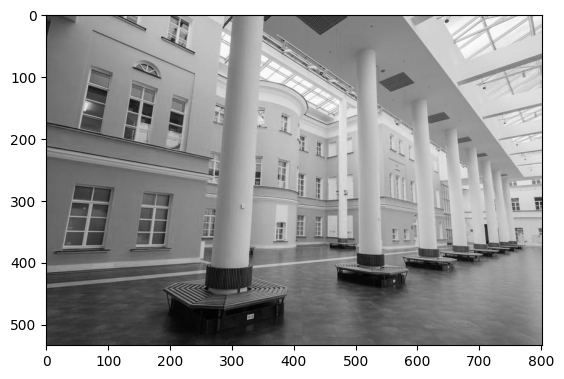

In [34]:
'''
# на самом деле, наша свертка эквивалентна вот такому преобразованию
# усреднение по каналам
- repeat(3, 1, 1):
    Метод repeat дублирует тензор по указанным осям.
    В данном случае, repeat(3, 1, 1) означает, что мы хотим повторить значения на оси 0 
    (которая соответствует количеству каналов) трижды, в результате чего тензор будет 
    иметь размерность [BS (где BS — размер батча), 3, H, W].
    В результате, для каждого пикселя мы создаем три канала (R, G, B), все 
    с одинаковым значением (усредненным значением из предыдущего шага).

- permute(1, 2, 0):

    Метод permute изменяет порядок осей тензора.
    Если тензор имеет размерность [BS, 3, H, W], то permute(1, 2, 0) изменяет порядок так, 
    чтобы он стал [BS, H, W, 3].
    Это необходимо для того, чтобы подготовить данные для визуализации с использованием Matplotlib, 
    которая ожидает, что последние измерения будут цветами (RGB).
'''

plt.imshow(img_t.mean(1).repeat(3, 1, 1).permute(1, 2, 0).numpy() / 255)

# Свертки в pytorch

In [39]:
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

from torchvision.transforms import ToTensor

from torch.optim import Adam

# ничего нового, ctrl-c ctrl-v с предыдущего занятия
class FMNISTImageSet:
    def __init__(self, train = True, transform = None):
        self.data = FashionMNIST("./tmp", train = train, download = True)

        self.transform = transform
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, item):
        # сделайте одноканальную картинку [1, 28, 28] с float32
        sample, label = self.data[item]

        if self.transform is not None:
            sample = self.transform(sample)
        else:
            sample = np.array(sample, dtype = np.float32)[None:, ...] / 255


        return dict(
            sample = sample,
            label = label,
        )

fmnist_train = FMNISTImageSet(train = True, transform = ToTensor())
fmnist_val = FMNISTImageSet(train = False, transform = ToTensor())

In [40]:
from copy import deepcopy

from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

from torchvision.transforms import ToTensor

from torch.optim import Adam

class Trainer:
    def __init__(self, model: nn.Module, optimizer,
                 train_dataset: Dataset, val_dataset: Dataset,
                 tboard_log_dir: str = './tboard_logs/', batch_size: int = 128):
        self.model = model
        self.optimizer = optimizer
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.batch_size = batch_size
        self.device = 'cpu'
        if torch.cuda.is_available():
            self.device = torch.cuda.current_device()
            self.model = self.model.to(self.device)
        self.global_step = 0
        self.log_writer = SummaryWriter(log_dir = tboard_log_dir)


    def save_checkpoint(self, path):
        torch.save(self.model.state_dict(), path)

    def train(self, num_epochs: int):
        model = self.model
        optimizer = self.optimizer
        train_loader = DataLoader(self.train_dataset, shuffle = True, pin_memory = True, 
                                  batch_size = self.batch_size)
        val_loader = DataLoader(self.val_dataset, shuffle = False, pin_memory = True, 
                                batch_size = self.batch_size)
        best_loss = float('inf')
        for epoch in range(num_epochs):
            model.train()
            for batch in tqdm(train_loader):
                batch = {k: v.to(self.device) for k, v in batch.items()}
                loss, details = model.compute_all(batch)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                for k, v in details.items():
                    self.log_writer.add_scalar(k + "/train", v, global_step=self.global_step)
                self.global_step += 1

            with torch.no_grad():
                model.eval()
                val_losses = []
                for batch in tqdm(val_loader):
                    batch = {k: v.to(self.device) for k, v in batch.items()}
                    loss, details = model.compute_all(batch)
                    for k, v in details.items():
                        self.log_writer.add_scalar(k + '/validation', v, global_step=self.global_step)
                    val_losses.append(loss.item())

                val_loss = np.mean(val_losses)

                if val_loss < best_loss:
                    self.save_checkpoint("./best_checkpoint.pth")
                    best_loss = val_loss


## CNNModel

In [43]:
import torch.optim as optim
import torch

In [45]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.inner = nn.Sequential(
            # [ bs, ch, w, h ]
            nn.Conv2d(1, 8, kernel_size = 3, padding = 1), # [ bs, 8, w, h ]
            nn.ReLU(),
            nn.Conv2d(8, 3, kernel_size = 3, padding = 1), # [ bs, 3, w, h ]

            nn.Flatten(1), # [ bs, 3 * w * h ]
            nn.Linear(3 * 28 * 28, 10), # [ bs, 10 ]
        )
    '''
            - двумерный свёрточный слой

            - in_channels=1: Этот параметр указывает, сколько каналов будет на входе в слой. 
            В данном случае это 1, что обычно означает, что входные данные представляют 
            собой одноцветные (чёрно-белые) изображения или изображения с одним каналом.

            - out_channels=8: Этот параметр определяет, сколько фильтров (ядров) будет использовать слой. 
            В данном случае это 8, что означает, что после применения свёртки размерность выхода 
            будет [B, 8, H', W'], где B — размер батча, H' и W' — высота и ширина выходных данных, 
            соответственно.
            
            - kernel_size=3: Этот параметр задаёт размер свёрточного ядра (фильтра). 
            Здесь указано 3, что означает, что фильтр будет иметь размер 3x3. 
            Это — стандартный размер для свёрточных слоёв и позволяет выявлять локальные признаки в изображении.

            - padding=1: Параметр padding добавляет дополнительные пиксели к краям входного изображения. 
            Значение 1 означает, что к каждому краю будет добавлен один пиксель (с заполнением нулями). 
            Это помогает сохранить пространственные размеры выходного тензора, поскольку при использовании фильтра 3x3 без паддинга размерность выходного изображения уменьшалась бы на 2 пикселя (по одному с каждой стороны).
            Таким образом, с паддингом размер выходного изображения будет таким же, 
            как и размер входного изображения.
    ''' 

    def forward(self, x):
        return self.inner(x)
    
    def compute_all(self, batch):  # удобно сделать функцию, в которой вычисляется лосс по пришедшему батчу
        x = batch['sample']
        y = batch['label']
        x = x.unsqueeze(1)
        # print(x.shape)
        logits = self.inner(x) # [ bs, 10 ]
        assert logits.size() == torch.Size([ x.size(0), 10 ]), f"logits size is wrong: {logits.size}"
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(axis=1) == y).float().mean().cpu().numpy()
        metrics = dict(acc = acc)
        return loss, metrics

# проверяйте работоспособность сразу
cnn_model = CNNModel()
cnn_opt = optim.SGD(cnn_model.parameters(), lr = 1e-2)
cnn_trainset = FMNISTImageSet(train = True)
cnn_valset = FMNISTImageSet(train = False)

cnn_trainer = Trainer(cnn_model, cnn_opt, cnn_trainset, cnn_valset, batch_size = 128)

In [46]:
cnn_trainer.train(3)

100%|██████████████████████████████████████████| 79/79 [00:00<00:00, 150.13it/s]


### MLP vs CNN

In [47]:
class VeryModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.inner = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100, 10),
        )

    def forward(self, x):
        return self.inner(x)
    
    def compute_all(self, batch):  # удобно сделать функцию, в которой вычисляется лосс по пришедшему батчу
        x = batch['sample']
        y = batch['label']
        logits = self.inner(x)
        
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(axis=1) == y).float().mean().cpu().numpy()
        metrics = dict(acc=acc)
        return loss, metrics

model = VeryModel()

In [50]:
model.parameters()

<generator object Module.parameters at 0x28994bd80>

In [48]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

79510

In [49]:
sum(p.numel() for p in cnn_model.parameters() if p.requires_grad)

23829

- numel() возвращает общее количество элементов в тензоре p. 
Для весов и смещений это количество эквивалентно количеству параметров, которые нужно обучить

- if p.requires_grad:
    Это условие проверяет, является ли параметр p обучаемым. 
    Если requires_grad равно True, это означает, что этот параметр будет 
    обновляться в процессе обратного распространения (backpropagation). 
    Параметры, для которых requires_grad установлено в False, не участвуют в процессе обучения, 
    поэтому они не учитываются в сумме.

# Pooling, рецептивное поле

Рецептивное поле (или receptive field) — это концепция в нейронных сетях, особенно в контексте свёрточных нейронных сетей (CNN), которая описывает область входного изображения, влияющую на активацию нейрона в определенном слое. Это понятие помогает понять, как нейронная сеть воспринимает информацию из входных данных и как различные слои модели взаимодействуют друг с другом.

## Pooling


> It is common to periodically insert a Pooling layer in-between successive Conv layers in a ConvNet architecture. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting. 

> https://cs231n.github.io/convolutional-networks/#pool

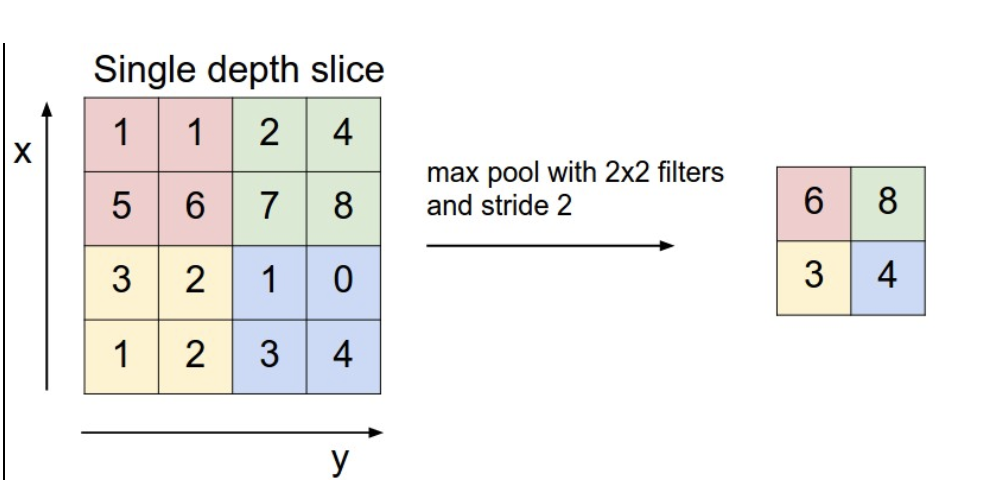

In [51]:
!wget https://i.imgflip.com/658r4d.jpg

--2024-10-05 16:05:23--  https://i.imgflip.com/658r4d.jpg
Resolving i.imgflip.com (i.imgflip.com)... 104.16.40.101, 104.16.71.101
Connecting to i.imgflip.com (i.imgflip.com)|104.16.40.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39502 (39K) [image/jpeg]
Saving to: ‘658r4d.jpg.2’

658r4d.jpg.2        100%[===================>]  38.58K  --.-KB/s    in 0.001s  

2024-10-05 16:05:24 (56.3 MB/s) - ‘658r4d.jpg.2’ saved [39502/39502]



##### POV: Когда преподаватель говорит, что домашки легкие

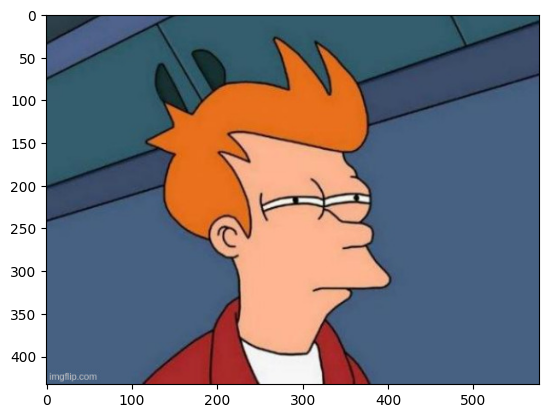

In [52]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("658r4d.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [53]:
maxpool = nn.MaxPool2d(7)
maxpool

MaxPool2d(kernel_size=7, stride=7, padding=0, dilation=1, ceil_mode=False)

**Обучаемые параметры?** Нет

In [54]:
list(maxpool.parameters())

[]

**Попробуем применить пуллинг к картинке**

In [55]:
image_t = torch.tensor(image, dtype=float)
image_t.shape

torch.Size([433, 577, 3])

In [56]:
polled_image_t = maxpool(image_t.unsqueeze(0).transpose(3, 1)).transpose(3, 1)[0, ...]
polled_image_t.shape

torch.Size([61, 82, 3])

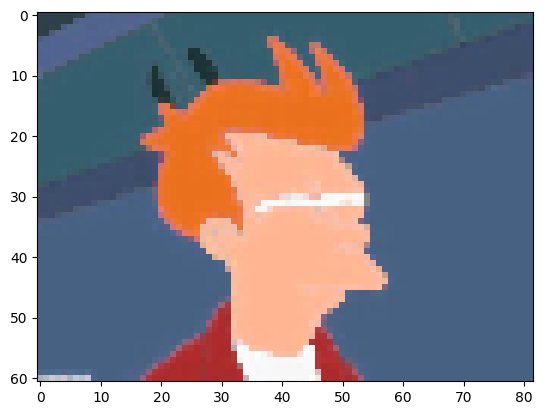

In [57]:
plt.imshow(polled_image_t.numpy().astype(int))

# TorchVision Models


## Residual Block, ResNet

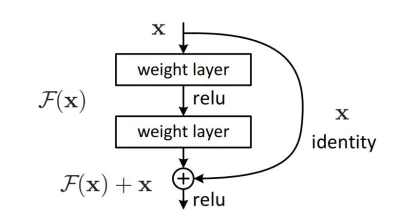

In [58]:
class ResBlock(nn.Module):
    def __init__(self, in_dim, hidden_dim):
        super().__init__()
        """
        in_dim --- размерность слоев на входе (используется в nn.Conv2d)
        hidden_dim --- скрытая размерность слоев (используется в nn.Conv2d)
        """

        self.model = nn.Sequential(
            nn.Linear( 3, 3, kernel_size=3),
            nn.ReLU(),
            nn.Linear( 3, 3, kernel_size=3),
        )

        self.activation = nn.ReLU()

        return

    def forward(self, x):
        
        conved = self.model(x)

        return self.activation(x + conved)


In [59]:
from torchvision.models import resnet18
import torch.optim as optim
import torch

resnet = resnet18(pretrained=True) # pretrained=True
resnet

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## ResNet + Adam/SGD

#### Adam

In [60]:
adam = optim.Adam(resnet.parameters(), lr = 3e-4)

out = resnet.forward(torch.rand(1, 3, 224, 224))
loss = out.mean()
loss.backward()

adam.step()

#### SGD

Потребляет меньше памяти, т. к. не хранит статистики по градиентам


In [61]:
sgd = optim.SGD(resnet.parameters(), lr=3e-4)

out = resnet.forward(torch.rand(1, 3, 224, 224))
loss = out.mean()
loss.backward()

sgd.step()

### Как применить существующую модель к моей задаче?

**Fine tuning**

In [62]:
from torchvision.models import resnet18
import torch.nn as nn

resnet = resnet18(pretrained=True)
prev_in_features = resnet.fc.in_features
resnet.fc = nn.Linear(prev_in_features, 10)

In [63]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Что дальше?

Cтоит постепенно размораживать веса модели. Если начать учить end2end, могут испорититься ядра сверток, так как от нового слоя потекут плохие градиенты, потому что он инициализирован рандомно




In [64]:
# замораживаем веса для backbone'а сети. Используя цикл, 
# мы проходим по всем параметрам модели и устанавливаем requires_grad = False. 
# Это означает, что градиенты не будут вычисляться для этих параметров, 
# и они не будут обновляться во время обучения.
for p in resnet.parameters():
    p.requires_grad = False

# размораживаем наш классификатор
for p in resnet.fc.parameters():
    p.requires_grad = True

# for p in resnet.layer4.parameters():
#     p.requires_grad = True
    

In [65]:
sum(p.numel() for p in resnet.parameters() if p.requires_grad)

5130

# Quiz

### Есть 6 сверток, пронумерованные буквами. 

A)
```
[0, 0, 0],
[0, 1, 0],
[0, 0, 0]
```
Б)
```
[0, 1, 0],
[0, -2, 0],
[0, 1, 0]
```
В)
```
[0, 0, 0],
[1, -2, 1],
[0, 0, 0]
```
Г)
```
[0, 1, 0],
[1, -4, 1],
[0, 1, 0]
```
Д)
```
[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]
```
Е)
```
[0.0625, 0.125, 0.0625],
[0.125, 0.25, 0.125],
[0.0625, 0.125, 0.0625]
```


### Сопоставьте ядра действию, которое делает это ядро:

1) Размытие

2) Увеличение резкости

3) Тождественное преобразование

4) Выделение вертикальных границ

5) Выделение горизонтальных границ

6) Выделение границ
<!-- 
```
A 3
Б 4
В 5
Г 6
Д 1
Е 2
``` -->

### Зачем нужен параметр `affine` в BatchNorm?

<!-- BN нромализует входной батч. Но может оказаться, что нейросети нужно какое-то смещение или какой-то std. Поэтому в этом слое создаются обучаемые параметры, которые так же вносят вклад в градиент. Чтобы если что, сеть могла выучить необходимое смещение, ско -->


### Зачем нужен `transform=` в классе датасета? Когда его нужно применять?

<!---
    В этот параметр передается функция для предобработки изображения. Эта функция обычно преобразует PIL Image объект (если вы прочитали изображение с помощью cv2) или numpy.array в тензор, нормализует значения пикселей (делит на 255). Самый простой вариант трансформа --- это [ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor)


    Еще с помощью этого метода можно сделать аугментацию изображения: 

    * [Resize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize) --- отмасштабировать изображение
    * [RandomHorizontalFlip](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomHorizontalFlip) --- перевернуть
    * [RandomRotation](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomRotation) --- повернуть

    С помощью аугментаций мы расширяем обучающую выборку при этом не прибегая к ручному сбору данных. Это позволяет обучить более стабильную сеть, часто повысить качество сети.

--->

### Какие основные параметры у свертки? 

<!-- 
Обучаемые параметры
* in/out + kernel_size # одна матрица размерности `[in, out, kernel_size[0], kernel_size[1]]`

Параметры, влияющие на процесс вычисления свертки
* padding
* stride -->


<!-- sum(map(lambda x: x.numel(), nn.Conv2d(3, 3, kernel_size=3).parameters())) -->


### Сколько параметров будет у свертки `nn.Conv2d(3, 3, kernel_size=3)`
<!-- 

nn.Conv2d(3, 3, kernel_size=3)

[3, 3, 3, 3]

kernel_size=3 ~ kernel_size=(3, 3)

```python

вроде 84 (+bias)

``` -->


### Для того, чтобы свертка с ядром 3x3 не изменяла проистранственную размерность изображения при `stride=1`, мы используем `padding=1`. Какое значение `padding` нужно использвать для ядра 5x5 и `stride=1`?

<!-- `padding=2` -->

### Как вы думаете, какие ядра выучивают реальные нейросетки на настоящих картинках?

<!-- Вообще говоря, принято считать, что фильтры выучиват текстуры. И используя это можно обмануть нейросеетвой классификатор, например, если показать ему рыбу с текстурой чешуи как кожа коровы, то классификатор, скорее всего будет считать это коровой.

Сами ядра можно визуализировать

https://deeplizard.com/learn/video/cNBBNAxC8l4

<img src="https://deeplizard.com/assets/jpg/c50ac9ac.jpg"> -->

### Какой размерности свертка и какие у нее параметры в cs231?

гифку https://cs231n.github.io/convolutional-networks/

> The visualization below iterates over the output activations (green), and shows that each element is computed by elementwise multiplying the highlighted input (blue) with the filter (red), summing it up, and then offsetting the result by the bias

```
Conv2d(?, ?, kernel_size=?, padding=?, stride?)
```

<!-- Conv2d(3, 2, kernel_size=3, padding=1, stride=2) -->


## После применения свертки к изображению мы получили 10 фильтров. За счет чего мы получаем разные значения в этих фильрах?


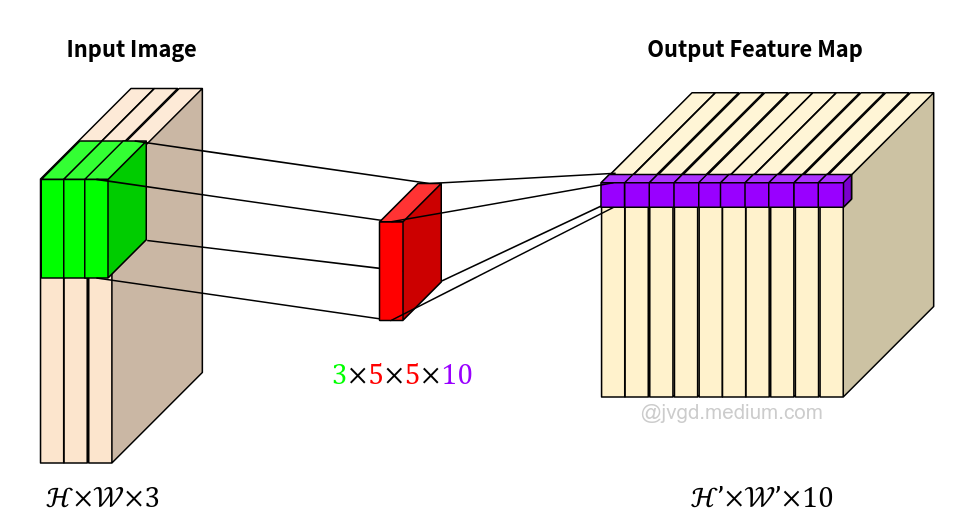


## Какое рецептивное поле у одной ячейки выходного тензора сверточной сети, состоящеи из двух подряд идущих сверток 3x3, (`stride=1`)?

```
nn.Sequential(
    nn.Conv2d(in, out_1,    kernel_size=3),
    # ...
    nn.Conv2d(out_1, out_2, kernel_size=3),
)
```

Другими словами: какое количество пикселей вложили свои значения в один "пиксель" итогового фильтра (feature-map'ки это одно и то же)?


<!--
    Ответ 5*5=25 . Рецептивное поле одного пикселя первого фильтра 3x3. 
    Если взять квадратик 3x3 этого фильтра, то это будет соответствовать как раз одному "пикселю" второго фильтра. И квадратику 5x5 исходного изображения
-->

## Зачем мы хотим увеличить рецептивное поле на более глубоких слоях?

<!-- 

Если решаем задачу классфикации, то последним слоем идет Linear. Этот слой применяется к последней фича-мапе. 

Linear ничего не умеет знать про структуру картинки, но никак не учитывает расположение пикселей, их "соседство". Но сами значениях последнего фильтра могут содержать такую информацию и потенциально чем больше рецептивное поле, тем больше информации мы можем сохранить в последнем фильтре

-->

## Почему при использовании Adam может потребоваться большее количество видеопамяти для обучения модели?


<!--
Тк Adam для каждого папраметра хранит по 2 статистики (скользящии средние по градиентам и по квадратам градиента). Эти данные тоже хранятся в видеопамяти
-->